In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###########file type and amount

In [2]:
df = pd.read_csv('single-file-fix.csv')
df_temp=df

In [3]:
source_type=['js','py','ipynb','ts','go','cpp','sol','css','bash','bat','h','html','sh','bash','java']
nonsource_type=['md','txt','json','xml','csv','markdown','conf','yml','bin','abi','LICENSE','lock','Makefile','yaml','LICENSE','LOG','ini','info','log','rst','tex']

all_type=source_type+nonsource_type

df_p=df_temp['file_type'].isin(all_type)

df=df[df_p]

df=df.reset_index(drop=True)
df.to_csv("single-file-fix-commont.csv")


df=pd.read_csv("single-file-fix-commont.csv",index_col=0)
print(df)
file_type_list= df.groupby('file_type').sum()
file_type_list

file_type_list.to_csv('file_type_list.csv')

                            repo                                    commit  \
0      Opus-foundation-contracts  8d909c74d7db0aa96e30b42a2ba28d08cff755b5   
1      Opus-foundation-contracts  764953fd712f2b5e791de7f1b1bf5dce0f64422c   
2      Opus-foundation-contracts  6a12ef6ec0daf3b83a49181d7a9db9eb1e62beea   
3                  flash-lending  1b69f63c4b041d6f6f658b7eb18a4ef8ad803ca4   
4                  flash-lending  1b69f63c4b041d6f6f658b7eb18a4ef8ad803ca4   
...                          ...                                       ...   
23952           mosaic-contracts  581b81d95c631f2cf3d33cd7796e428bcbaa506b   
23953           mosaic-contracts  581b81d95c631f2cf3d33cd7796e428bcbaa506b   
23954           mosaic-contracts  9f5483c562e41e4e583d21ce3d4c0252f7b33a5a   
23955           mosaic-contracts  9f5483c562e41e4e583d21ce3d4c0252f7b33a5a   
23956           mosaic-contracts  e73168a1f0f8277b9b4771318451b73c33bbb0ba   

                           file  add_file  delete_file file_typ

In [4]:
num_sol_fix = pd.DataFrame(columns = ['repo', 'total', '0', '1', '2', '3', '4', '5', '6', '7', '8', '8+'])
num_sol_fix

,repo,total,0,1,2,3,4,5,6,7,8,8+


In [5]:
repo_list = df['repo'].drop_duplicates().values.tolist()
repo_list

['Opus-foundation-contracts',
 'flash-lending',
 'contractsV2',
 'exchange-wrappers',
 'pooltogether-pool-contracts',
 'conditional-tokens-contracts',
 'Proof-Of-Humanity',
 'aragon-apps',
 'plasma-cash',
 'airswap-protocols',
 'polymath-token',
 'token',
 'bsc-genesis-contract',
 'verified-smart-contracts',
 'mdexSwap-contracts',
 'pos-portal',
 'kleros-interaction',
 'trusttoken-smart-contracts',
 'KyberNetwork-smart-contracts',
 'oneswap_contract_ethereum',
 'truffle-starter-kit',
 'polymath-core',
 'protocol',
 'synthetix',
 'yearn-protocol',
 'argent-contracts',
 'fei-protocol-core',
 'colonyNetwork',
 'pm-contracts',
 'defisaver-contracts',
 'erc-1155',
 'bandprotocol-contracts',
 'kleros',
 'status-network-token',
 'multisender',
 'mana',
 'land',
 'protocol-contracts',
 'contracts-solidity',
 'tokenbridge-contracts',
 'WETH10',
 'Sparkle-Proof-Of-Loyalty',
 'renex-sol',
 'r-token',
 'uniswap-v2-periphery',
 'mosaic-contracts']

In [6]:
print(df)
for repo in repo_list:
  
    repo_commits = df[df['repo'] == repo]['commit'].drop_duplicates().tolist()
    dict_to_append ={'repo': repo, 'total': None, '0': 0, '1': 0,'2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '8+': 0}
    
    for commit in repo_commits:
        sol_fix_times = len(df[ (df['repo'] == repo) & (df['commit'] == commit) & (df['solidity'] == True)])
        
        if sol_fix_times < 9:
            dict_to_append[str(sol_fix_times)] += 1
        else:
            dict_to_append['8+'] += 1
            #print(commit)
            

    
    dict_to_append['total'] = int(len(repo_commits))
    
   
    
    num_sol_fix = num_sol_fix.append(dict_to_append, ignore_index = True)

                            repo                                    commit  \
0      Opus-foundation-contracts  8d909c74d7db0aa96e30b42a2ba28d08cff755b5   
1      Opus-foundation-contracts  764953fd712f2b5e791de7f1b1bf5dce0f64422c   
2      Opus-foundation-contracts  6a12ef6ec0daf3b83a49181d7a9db9eb1e62beea   
3                  flash-lending  1b69f63c4b041d6f6f658b7eb18a4ef8ad803ca4   
4                  flash-lending  1b69f63c4b041d6f6f658b7eb18a4ef8ad803ca4   
...                          ...                                       ...   
23952           mosaic-contracts  581b81d95c631f2cf3d33cd7796e428bcbaa506b   
23953           mosaic-contracts  581b81d95c631f2cf3d33cd7796e428bcbaa506b   
23954           mosaic-contracts  9f5483c562e41e4e583d21ce3d4c0252f7b33a5a   
23955           mosaic-contracts  9f5483c562e41e4e583d21ce3d4c0252f7b33a5a   
23956           mosaic-contracts  e73168a1f0f8277b9b4771318451b73c33bbb0ba   

                           file  add_file  delete_file file_typ

In [7]:
num_sol_fix

,repo,total,0,1,2,3,4,5,6,7,8,8+
0,Opus-foundation-contracts,3,0,3,0,0,0,0,0,0,0,0
1,flash-lending,11,6,3,0,1,0,0,1,0,0,0
2,contractsV2,142,43,58,16,2,4,3,0,2,2,12
3,exchange-wrappers,14,7,5,1,0,0,0,0,0,0,1
4,pooltogether-pool-contracts,120,30,38,16,7,6,6,6,2,0,9
5,conditional-tokens-contracts,43,27,10,3,1,0,0,1,0,0,1
6,Proof-Of-Humanity,32,5,20,5,1,0,0,0,0,1,0
7,aragon-apps,272,166,65,19,7,5,5,1,2,0,2
8,plasma-cash,126,94,28,3,0,0,0,0,1,0,0
9,airswap-protocols,273,190,62,12,4,0,1,1,0,0,3


In [8]:




num_source_fix = pd.DataFrame(columns = ['repo', 'total', '0', '1', '2', '3', '4', '5', '6', '7', '8', '8+'])
print(num_source_fix)

for repo in repo_list:
  
    repo_commits = df[df['repo'] == repo]['commit'].drop_duplicates().tolist()
    dict_to_append ={'repo': repo, 'total': None, '0': 0, '1': 0,'2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '8+': 0}
    
    for commit in repo_commits:
        source_fix_times = len(df[ (df['repo'] == repo) & (df['commit'] == commit) & (df['file_type'].isin(source_type) )])
        
        if source_fix_times < 9:
            dict_to_append[str(source_fix_times)] += 1
        else:
            dict_to_append['8+'] += 1
            #print(commit)
            

    
    dict_to_append['total'] = int(len(repo_commits))
    
   
    
    num_source_fix = num_source_fix.append(dict_to_append, ignore_index = True)

Empty DataFrame
Columns: [repo, total, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8+]
Index: []


In [9]:
num_source_fix

,repo,total,0,1,2,3,4,5,6,7,8,8+
0,Opus-foundation-contracts,3,0,3,0,0,0,0,0,0,0,0
1,flash-lending,11,1,3,4,2,0,0,0,0,0,1
2,contractsV2,142,0,83,22,8,7,4,1,1,2,14
3,exchange-wrappers,14,2,4,2,0,2,2,1,0,0,1
4,pooltogether-pool-contracts,120,11,26,26,9,5,6,8,3,6,20
5,conditional-tokens-contracts,43,10,21,5,3,1,0,1,0,0,2
6,Proof-Of-Humanity,32,1,14,10,6,0,0,0,0,0,1
7,aragon-apps,272,35,98,46,27,19,11,9,6,2,19
8,plasma-cash,126,8,58,25,15,6,7,3,1,2,1
9,airswap-protocols,273,50,136,49,19,3,6,3,1,2,4


In [10]:
nonsource_type=['md','txt','json','xml','csv','markdown','conf','yml','bin','abi','LICENSE','lock','Makefile','yaml','LICENSE','LOG','ini','info','log','rst','tex']


num_nonsource_fix = pd.DataFrame(columns = ['repo', 'total', '0', '1', '2', '3', '4', '5', '6', '7', '8', '8+'])
print(num_nonsource_fix)

for repo in repo_list:
  
    repo_commits = df[df['repo'] == repo]['commit'].drop_duplicates().tolist()
    dict_to_append ={'repo': repo, 'total': None, '0': 0, '1': 0,'2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '8+': 0}
    
    for commit in repo_commits:
        nonsource_fix_times = len(df[ (df['repo'] == repo) & (df['commit'] == commit) & (df['file_type'].isin(nonsource_type) )])
        
        if  nonsource_fix_times < 9:
            dict_to_append[str(nonsource_fix_times)] += 1
        else:
            dict_to_append['8+'] += 1
            #print(commit)
            

    
    dict_to_append['total'] = int(len(repo_commits))
    
   
    
    num_nonsource_fix = num_nonsource_fix.append(dict_to_append, ignore_index = True)

Empty DataFrame
Columns: [repo, total, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8+]
Index: []


In [11]:
num_nonsource_fix


,repo,total,0,1,2,3,4,5,6,7,8,8+
0,Opus-foundation-contracts,3,3,0,0,0,0,0,0,0,0,0
1,flash-lending,11,8,3,0,0,0,0,0,0,0,0
2,contractsV2,142,137,4,1,0,0,0,0,0,0,0
3,exchange-wrappers,14,1,1,4,7,0,0,0,1,0,0
4,pooltogether-pool-contracts,120,72,23,13,4,4,0,0,0,0,4
5,conditional-tokens-contracts,43,29,9,3,0,0,1,0,0,0,1
6,Proof-Of-Humanity,32,31,1,0,0,0,0,0,0,0,0
7,aragon-apps,272,181,69,12,5,1,0,1,0,0,3
8,plasma-cash,126,102,12,11,0,0,1,0,0,0,0
9,airswap-protocols,273,191,69,11,1,0,0,0,0,0,1


In [12]:
num_sol_fix[num_sol_fix.columns[1:]].sum().values.tolist()
print(num_sol_fix.values)

[['Opus-foundation-contracts' 3 0 3 0 0 0 0 0 0 0 0]
 ['flash-lending' 11 6 3 0 1 0 0 1 0 0 0]
 ['contractsV2' 142 43 58 16 2 4 3 0 2 2 12]
 ['exchange-wrappers' 14 7 5 1 0 0 0 0 0 0 1]
 ['pooltogether-pool-contracts' 120 30 38 16 7 6 6 6 2 0 9]
 ['conditional-tokens-contracts' 43 27 10 3 1 0 0 1 0 0 1]
 ['Proof-Of-Humanity' 32 5 20 5 1 0 0 0 0 1 0]
 ['aragon-apps' 272 166 65 19 7 5 5 1 2 0 2]
 ['plasma-cash' 126 94 28 3 0 0 0 0 1 0 0]
 ['airswap-protocols' 273 190 62 12 4 0 1 1 0 0 3]
 ['polymath-token' 12 2 8 0 0 1 0 1 0 0 0]
 ['token' 5 2 1 2 0 0 0 0 0 0 0]
 ['bsc-genesis-contract' 21 1 11 3 1 1 0 0 1 0 3]
 ['verified-smart-contracts' 68 64 3 0 0 0 0 0 0 0 1]
 ['mdexSwap-contracts' 8 2 2 2 1 0 0 0 1 0 0]
 ['pos-portal' 103 39 35 14 7 3 0 1 0 0 4]
 ['kleros-interaction' 269 36 207 20 1 1 3 0 1 0 0]
 ['trusttoken-smart-contracts' 252 75 73 38 22 8 10 6 6 0 14]
 ['KyberNetwork-smart-contracts' 319 108 121 30 22 11 5 4 2 4 12]
 ['oneswap_contract_ethereum' 4 0 1 0 0 1 0 0 1 0 1]
 ['truf

No handles with labels found to put in legend.


[0.08693500494886176, 0.4671725503134279, 0.17485978225008247, 0.08742989112504124, 0.04239524909270868, 0.029363246453315738, 0.022929726162982514, 0.013856812933025405, 0.010887495875948531, 0.06417024084460574]
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '8+'], dtype='object')


C:\Users\bluee\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bluee\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


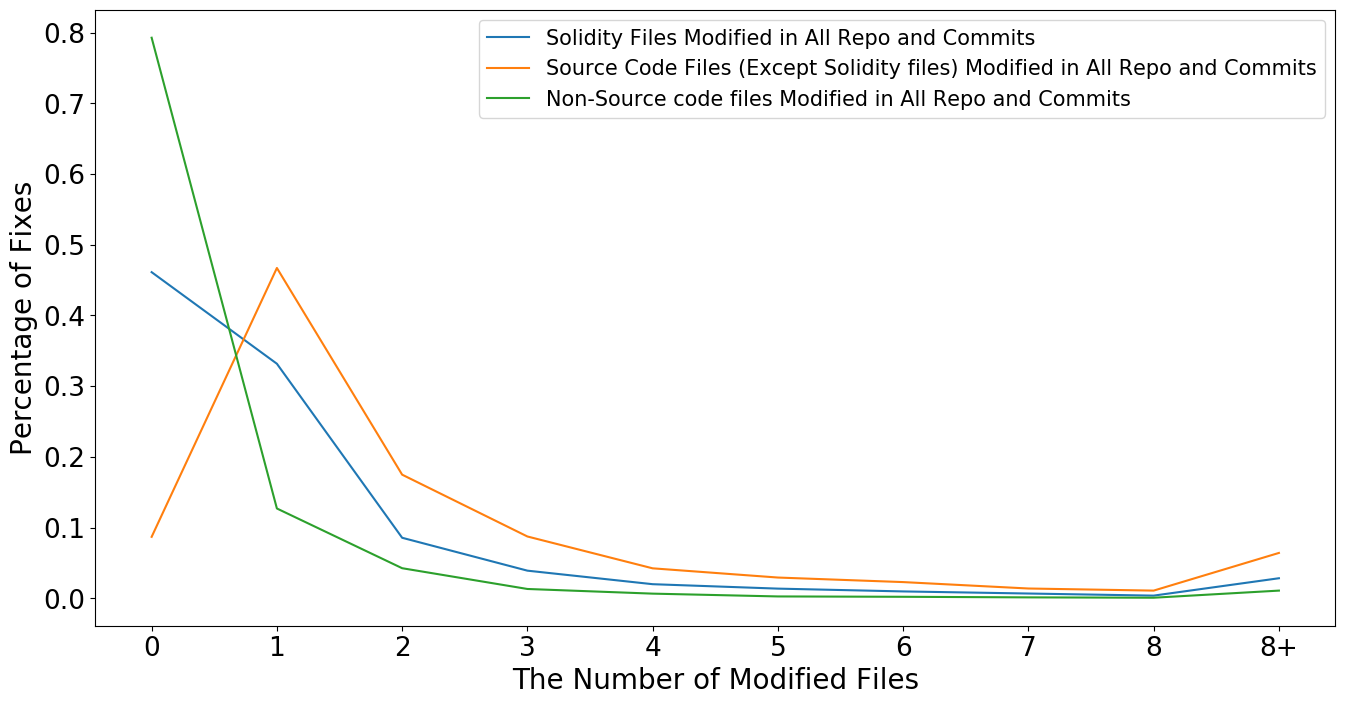

In [13]:
fig = plt.figure(figsize= (16,8))
ax1 = fig.add_subplot()


num_list = num_sol_fix.values.tolist()[45][2:]
total = num_sol_fix[num_sol_fix.columns[1:]].sum().values.tolist()[0]
num_list = num_sol_fix[num_sol_fix.columns[1:]].sum().values.tolist()[1:]
value_list = [x/total for x in num_list]

cor_list = num_sol_fix.columns[2:]



source_total = num_source_fix[num_source_fix.columns[1:]].sum().values.tolist()[0]
source_num_list = num_source_fix[num_source_fix.columns[1:]].sum().values.tolist()[1:]
source_value_list = [x/total for x in source_num_list]
print(source_value_list)
source_cor_list = num_source_fix.columns[2:]


nonsource_total = num_nonsource_fix[num_nonsource_fix.columns[1:]].sum().values.tolist()[0]
nonsource_num_list = num_nonsource_fix[num_nonsource_fix.columns[1:]].sum().values.tolist()[1:]
nonsource_value_list = [x/total for x in nonsource_num_list]
nonsource_cor_list = num_nonsource_fix.columns[2:]



plt.xticks(fontsize=19)
plt.yticks(fontsize=19)

ax1.legend(loc = 'best', ncol = 3,fontsize=15)
    
print(cor_list)
ax1.plot(cor_list, value_list, label='Solidity Files Modified in All Repo and Commits')
ax1.plot(source_cor_list, source_value_list, label='Source Code Files (Except Solidity files) Modified in All Repo and Commits')

ax1.plot(nonsource_cor_list, nonsource_value_list, label='Non-Source code files Modified in All Repo and Commits')




ax1.set_ylabel('Percentage of Fixes',fontsize=20)
ax1.set_xlabel('The Number of Modified Files',fontsize=20)

ax1.legend(loc='best',fontsize=15)
fig.savefig('png/rq1-sourcesol-modified-during-a-fix-sum-up.jpg',bbox_inches = 'tight')
plt.show()

[0 1 2 3 4 5 6 7 8 9]


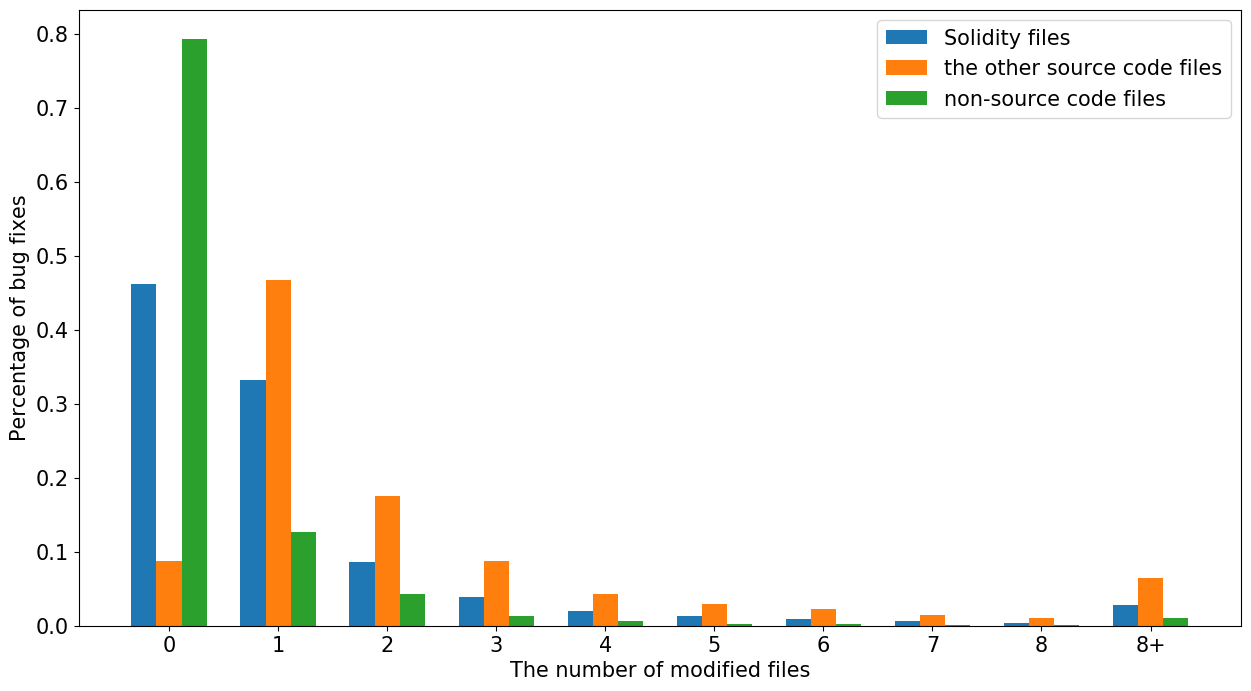

In [43]:
fig = plt.figure(figsize= (15,8))
ax1 = fig.add_subplot()

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x = np.arange(len(cor_list)) 
print(x)

#ax1.plot(element_keys, element_values)
bar_width = 0.23
#for i in range(len(element_keys)):

plt.bar(x- bar_width, value_list, width = bar_width,label='Solidity files')
plt.bar(x,source_value_list,  width = bar_width, label='the other source code files')

plt.bar(x+bar_width,nonsource_value_list, width = bar_width, label='non-source code files')


ax1.set_xticks(x)
ax1.set_xticklabels(cor_list)
ax1.set_ylabel('Percentage of bug fixes',fontsize=15)
ax1.set_xlabel('The number of modified files',fontsize=15)

ax1.legend(fontsize=15)
plt.show()
fig.savefig('png/number-file-type.jpg',bbox_inches = 'tight')

RQ2